### Notebook to plot volume-integrated quantities defined in ```subset_vol_int_calcs.ipynb```.
Plots may be remade several times to be formatted for powerpoint presentations 

In [1]:
#Packages 
import numpy as np
import xgcm
from xgcm import Grid
import xarray as xr
import xroms
from datetime import datetime

import glob
from xhistogram.xarray import histogram
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.ticker as tick
from matplotlib.dates import DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
from xhistogram.xarray import histogram
from datetime import timedelta
import time

import warnings
warnings.filterwarnings("ignore") #The chaotic option, used to suppress issues with cf_time with xroms 

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import pyplot as plt, patches

### Open the calculations 

In [26]:
# HSIMT
svar_h = []
svar1m_h = []
mix_h = []
mix1m_h = []
ene_h = []
ape_rho_h = []
#U3HC4
svar_u = []
svar1m_u = []
mix_u = []
mix1m_u = []
ene_u = []
ape_rho_u = []
#MPDATA
svar_m = []
svar1m_m = []
mix_m = []
mix1m_m = []
ene_m = []
ape_rho_m = []

#Specify number of paths and open
npaths = 8
for i in range(npaths):
    svar_h.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/figures_draft1/outputs/svar_vavg_whole_hsimt_'+'ensemble_'+str(i)+'.nc'))
    svar1m_h.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/tadvection_new/svar_vavg_top1m_hsimt_'+'ensemble_'+str(i)+'.nc'))
    mix_h.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/tadvection_new/mix_vint_whole_hsimt_'+'ensemble_'+str(i)+'.nc'))
    mix1m_h.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/tadvection_new/mix_vint_top1m_hsimt_'+'ensemble_'+str(i)+'.nc'))
    ene_h.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/tadvection_new/ene_vint_whole_hsimt_'+'ensemble_'+str(i)+'.nc'))
    ape_rho_h.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/figures_draft1/outputs/ape_vint_whole_hsimt_'+'ensemble_'+str(i)+'.nc').isel(ocean_time = slice(0,721)))
    # ape_rho_h.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/figures_draft1/ape_vint_initstrat_hsimt_'+'ensemble_'+str(i)+'.nc'))
    
    svar_u.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/figures_draft1/outputs/svar_vavg_whole_u3hc4_'+'ensemble_'+str(i)+'.nc'))
    svar1m_u.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/tadvection_new/svar_vavg_top1m_u3c4_'+'ensemble_'+str(i)+'.nc'))
    mix_u.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/tadvection_new/mix_vint_whole_u3c4_'+'ensemble_'+str(i)+'.nc'))
    mix1m_u.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/tadvection_new/mix_vint_top1m_u3c4_'+'ensemble_'+str(i)+'.nc'))
    ene_u.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/tadvection_new/ene_vint_whole_u3c4_'+'ensemble_'+str(i)+'.nc'))
    ape_rho_u.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/figures_draft1/outputs/ape_vint_whole_u3hc4_'+'ensemble_'+str(i)+'.nc').isel(ocean_time = slice(0,721)))
    # ape_rho_u.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/figures_draft1/ape_vint_initstrat_u3hc4_'+'ensemble_'+str(i)+'.nc'))
    
    svar_m.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/figures_draft1/outputs/svar_vavg_decomp_mpdata_'+'ensemble_'+str(i)+'.nc'))
    svar1m_m.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/tadvection_new/svar_vavg_top1m_mpdata_'+'ensemble_'+str(i)+'.nc'))
    mix_m.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/tadvection_new/mix_vint_whole_mpdata_'+'ensemble_'+str(i)+'.nc'))
    mix1m_m.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/tadvection_new/mix_vint_top1m_mpdata_'+'ensemble_'+str(i)+'.nc'))
    ene_m.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/tadvection_new/ene_vint_whole_mpdata_'+'ensemble_'+str(i)+'.nc'))
    ape_rho_m.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/figures_draft1/outputs/ape_vint_whole_mpdata_'+'ensemble_'+str(i)+'.nc').isel(ocean_time = slice(0,721)))
    # ape_rho_m.append(xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/figures_draft1/ape_vint_initstrat_mpdata_'+'ensemble_'+str(i)+'.nc'))

# The first simulation was accidentally run longer than 30 days. Just lop off those end points manually 
ene_u[0] = ene_u[0].isel(ocean_time = slice(0,720))
ape_rho_u[0] = ape_rho_u[0].isel(ocean_time = slice(0,720))
ape_rho_h[0] = ape_rho_h[0].isel(ocean_time = slice(0,720))
ape_rho_m[0] = ape_rho_m[0].isel(ocean_time = slice(0,720))
mix1m_u[0] = mix1m_u[0].isel(ocean_time = slice(0,720))
mix_u[0] = mix_u[0].isel(ocean_time = slice(0,720))
svar1m_u[0] = svar1m_u[0].isel(ocean_time = slice(0,720))
svar_u[0] = svar_u[0].isel(ocean_time = slice(0,720))

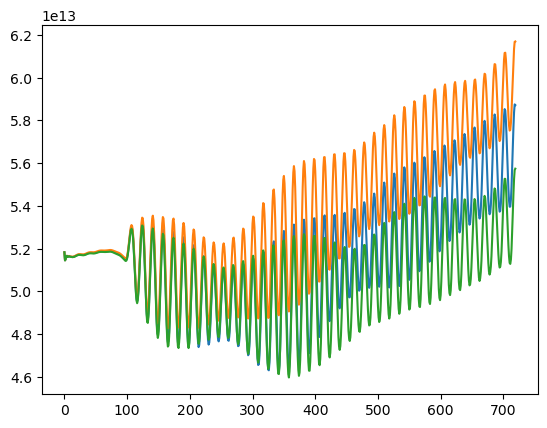

In [51]:
plt.plot(ape_rho_u[0].ape_r)
plt.plot(ape_rho_h[0].ape_r)
plt.plot(ape_rho_m[0].ape_r)

### Convert them all to numpy arrays
Automate this with better code later 

In [28]:
eke_h = np.array([ene_h[0].eke,ene_h[1].eke,ene_h[2].eke,ene_h[3].eke,ene_h[4].eke,ene_h[5].eke,ene_h[6].eke,ene_h[7].eke])
mke_h = np.array([ene_h[0].mke,ene_h[1].mke,ene_h[2].mke,ene_h[3].mke,ene_h[4].mke,ene_h[5].mke,ene_h[6].mke,ene_h[7].mke])

eke_u = np.array([ene_u[0].eke,ene_u[1].eke,ene_u[2].eke,ene_u[3].eke,ene_u[4].eke,ene_u[5].eke,ene_u[6].eke,ene_u[7].eke])
mke_u = np.array([ene_u[0].mke,ene_u[1].mke,ene_u[2].mke,ene_u[3].mke,ene_u[4].mke,ene_u[5].mke,ene_u[6].mke,ene_u[7].mke])

eke_m = np.array([ene_m[0].eke,ene_m[1].eke,ene_m[2].eke,ene_m[3].eke,ene_m[4].eke,ene_m[5].eke,ene_m[6].eke,ene_m[7].eke])
mke_m = np.array([ene_m[0].mke,ene_m[1].mke,ene_m[2].mke,ene_m[3].mke,ene_m[4].mke,ene_m[5].mke,ene_m[6].mke,ene_m[7].mke])

# APE 
ape_h = np.array([ape_rho_h[0].ape_r,ape_rho_h[1].ape_r,ape_rho_h[2].ape_r,ape_rho_h[3].ape_r,ape_rho_h[4].ape_r,ape_rho_h[5].ape_r,ape_rho_h[6].ape_r,ape_rho_h[7].ape_r])
ape_m = np.array([ape_rho_m[0].ape_r,ape_rho_m[1].ape_r,ape_rho_m[2].ape_r,ape_rho_m[3].ape_r,ape_rho_m[4].ape_r,ape_rho_m[5].ape_r,ape_rho_m[6].ape_r,ape_rho_m[7].ape_r])
ape_u = np.array([ape_rho_u[0].ape_r,ape_rho_u[1].ape_r,ape_rho_u[2].ape_r,ape_rho_u[3].ape_r,ape_rho_u[4].ape_r,ape_rho_u[5].ape_r,ape_rho_u[6].ape_r,ape_rho_u[7].ape_r])

# svar_tot
sv_tot_h = np.array([svar_h[0].svar_tot,svar_h[1].svar_tot,svar_h[2].svar_tot,svar_h[3].svar_tot,svar_h[4].svar_tot,svar_h[5].svar_tot,svar_h[6].svar_tot,svar_h[7].svar_tot])
sv_tot_u = np.array([svar_u[0].svar_tot,svar_u[1].svar_tot,svar_u[2].svar_tot,svar_u[3].svar_tot,svar_u[4].svar_tot,svar_u[5].svar_tot,svar_u[6].svar_tot,svar_u[7].svar_tot])
sv_tot_m = np.array([svar_m[0].svar_tot,svar_m[1].svar_tot,svar_m[2].svar_tot,svar_m[3].svar_tot,svar_m[4].svar_tot,svar_m[5].svar_tot,svar_m[6].svar_tot,svar_m[7].svar_tot])

# svar_vertical
sv_ver_h = np.array([svar_h[0].svar_vert,svar_h[1].svar_vert,svar_h[2].svar_vert,svar_h[3].svar_vert,svar_h[4].svar_vert,svar_h[5].svar_vert,svar_h[6].svar_vert,svar_h[7].svar_vert])
sv_ver_u = np.array([svar_u[0].svar_vert,svar_u[1].svar_vert,svar_u[2].svar_vert,svar_u[3].svar_vert,svar_u[4].svar_vert,svar_u[5].svar_vert,svar_u[6].svar_vert,svar_u[7].svar_vert])
sv_ver_m = np.array([svar_m[0].svar_vert,svar_m[1].svar_vert,svar_m[2].svar_vert,svar_m[3].svar_vert,svar_m[4].svar_vert,svar_m[5].svar_vert,svar_m[6].svar_vert,svar_m[7].svar_vert])

# svar_horizontal
sv_hor_h = np.array([svar_h[0].svar_horz,svar_h[1].svar_horz,svar_h[2].svar_horz,svar_h[3].svar_horz,svar_h[4].svar_horz,svar_h[5].svar_horz,svar_h[6].svar_horz,svar_h[7].svar_horz])
sv_hor_u = np.array([svar_u[0].svar_horz,svar_u[1].svar_horz,svar_u[2].svar_horz,svar_u[3].svar_horz,svar_u[4].svar_horz,svar_u[5].svar_horz,svar_u[6].svar_horz,svar_u[7].svar_horz])
sv_hor_m = np.array([svar_m[0].svar_horz,svar_m[1].svar_horz,svar_m[2].svar_horz,svar_m[3].svar_horz,svar_m[4].svar_horz,svar_m[5].svar_horz,svar_m[6].svar_horz,svar_m[7].svar_horz])

#Physical mixing
mphy_h = np.array([mix_h[0].mphy,mix_h[1].mphy,mix_h[2].mphy,mix_h[3].mphy,mix_h[4].mphy,mix_h[5].mphy,mix_h[6].mphy,mix_h[7].mphy])
mnum_h = np.array([mix_h[0].mnum,mix_h[1].mnum,mix_h[2].mnum,mix_h[3].mnum,mix_h[4].mnum,mix_h[5].mnum,mix_h[6].mnum,mix_h[7].mnum])
mtot_h = np.array([mix_h[0].mtot,mix_h[1].mtot,mix_h[2].mtot,mix_h[3].mtot,mix_h[4].mtot,mix_h[5].mtot,mix_h[6].mtot,mix_h[7].mtot])

mphy_u = np.array([mix_u[0].mphy,mix_u[1].mphy,mix_u[2].mphy,mix_u[3].mphy,mix_u[4].mphy,mix_u[5].mphy,mix_u[6].mphy,mix_u[7].mphy])
mnum_u = np.array([mix_u[0].mnum,mix_u[1].mnum,mix_u[2].mnum,mix_u[3].mnum,mix_u[4].mnum,mix_u[5].mnum,mix_u[6].mnum,mix_u[7].mnum])
mtot_u = np.array([mix_u[0].mtot,mix_u[1].mtot,mix_u[2].mtot,mix_u[3].mtot,mix_u[4].mtot,mix_u[5].mtot,mix_u[6].mtot,mix_u[7].mtot])

mphy_m = np.array([mix_m[0].mphy,mix_m[1].mphy,mix_m[2].mphy,mix_m[3].mphy,mix_m[4].mphy,mix_u[5].mphy,mix_u[6].mphy,mix_u[7].mphy])
mnum_m = np.array([mix_m[0].mnum,mix_m[1].mnum,mix_m[2].mnum,mix_m[3].mnum,mix_m[4].mnum,mix_u[5].mnum,mix_u[6].mnum,mix_u[7].mnum])
mtot_m = np.array([mix_m[0].mtot,mix_m[1].mtot,mix_m[2].mtot,mix_m[3].mtot,mix_m[4].mtot,mix_u[5].mtot,mix_u[6].mtot,mix_u[7].mtot])

### Calculate ensemble averages and prescribed confidence interval. 
Then smooth the ensemble with a 16 hour running mean to account for the wind forcing. This improves  

In [29]:
def ensemble_stats(arr, CI, N, mode):
    '''
Function to calculate ensemble mean, standard deviation and either the 95th or 99th
confidence interval to the ensemble mean. Then, smooth the result with a 16 hour
filter to correspond to the prescribed inertial period of 16 hours.
Inputs:
-------
arr - Numpy array of the variable. Dims - [nensembles,ntimes]
CI - Prescribed confidence interval, e.g. 99 for 99th percentile
N - length of convolution filter, see numpy.convolve()
mode - see numpy.convolve()
Outputs:
-------
arr_com - Master array, containing
arr_mean - Convolved ensemble mean at each time
arr_std - Convolved ensemble standard deviation at each time
arr_errp - Convolved ens. mean + prescribed confidence interval
arr_errm - Convolved ens. mean - prescribed confidence interval
    '''
    #Ensemble mean at each time
    ens_mean = arr.mean(axis = 0) 
    
    #Ensemble standard deviation at each time
    arr_std = arr.std(axis = 0) 
    
    #Add prescribed confidence interval to ensemble mean
    if CI == 95:
        arr_errp = ens_mean+(1.95996*(arr_std/np.shape(arr)[0])) #np.shape(N)[0] just takes the rows, should be 5
        arr_errm = ens_mean-(1.95996*(arr_std/np.shape(arr)[0]))
        
    if CI == 99:
        arr_errp = ens_mean+(2.57583*(arr_std/np.shape(arr)[0])) #np.shape(N)[0] just takes the rows, should be 5
        arr_errm = ens_mean-(2.57583*(arr_std/np.shape(arr)[0]))
    
    #Smooth with a running mean via convolution
    arr_mean =  np.convolve(ens_mean, np.ones(N)/N, mode = 'same')
    arrmean_m = np.convolve(arr_errm, np.ones(N)/N, mode = 'same')
    arrmean_p = np.convolve(arr_errp, np.ones(N)/N, mode = 'same')
    
    #Merge all variables to a master array
    arr_com = np.array([arr_mean, arr_std, arrmean_m, arrmean_p])
    # print(np.shape(arr)[0]) # Print the number of ensembles as a QC check
    return arr_com 

#Eddy kinetic energy
arr = eke_h; CI = 95; N = 16; mode = 'same'
eke_hsimt = ensemble_stats(arr, CI, N, mode)
arr = eke_u
eke_u3hc4 = ensemble_stats(arr, CI, N, mode)
arr = eke_m
eke_mpdata = ensemble_stats(arr, CI, N, mode)

#Mean kinetic energy
arr = mke_h
mke_hsimt = ensemble_stats(arr, CI, N, mode)
arr = mke_u
mke_u3hc4 = ensemble_stats(arr, CI, N, mode)
arr = mke_m
mke_mpdata = ensemble_stats(arr, CI, N, mode)

#Available potential energy
arr = ape_h
ape_hsimt = ensemble_stats(arr, CI, N, mode)
arr = ape_u
ape_u3hc4 = ensemble_stats(arr, CI, N, mode)
arr = ape_m
ape_mpdata = ensemble_stats(arr, CI, N, mode)

#Salinity variance
arr = sv_tot_h; 
svar_tot_hsimt = ensemble_stats(arr, CI, N, mode)
arr = sv_tot_u
svar_tot_u3hc4 = ensemble_stats(arr, CI, N, mode)
arr = sv_tot_m
svar_tot_mpdata = ensemble_stats(arr, CI, N, mode)

arr = sv_ver_h; 
svar_ver_hsimt = ensemble_stats(arr, CI, N, mode)
arr = sv_ver_u
svar_ver_u3hc4 = ensemble_stats(arr, CI, N, mode)
arr = sv_ver_m
svar_ver_mpdata = ensemble_stats(arr, CI, N, mode)

arr = sv_hor_h; 
svar_hor_hsimt = ensemble_stats(arr, CI, N, mode)
arr = sv_hor_u
svar_hor_u3hc4 = ensemble_stats(arr, CI, N, mode)
arr = sv_hor_m
svar_hor_mpdata = ensemble_stats(arr, CI, N, mode)

#Physical mixing
arr = mphy_h; 
mphy_hsimt = ensemble_stats(arr, CI, N, mode)
arr = mphy_u
mphy_u3hc4 = ensemble_stats(arr, CI, N, mode)
arr = mphy_m
mphy_mpdata = ensemble_stats(arr, CI, N, mode)

#Numerical mixing
arr = mnum_h; 
mnum_hsimt = ensemble_stats(arr, CI, N, mode)
arr = mnum_u
mnum_u3hc4 = ensemble_stats(arr, CI, N, mode)
arr = mnum_m
mnum_mpdata = ensemble_stats(arr, CI, N, mode)

#Total mixing
arr = mtot_h; 
mtot_hsimt = ensemble_stats(arr, CI, N, mode)
arr = mtot_u
mtot_u3hc4 = ensemble_stats(arr, CI, N, mode)
arr = mtot_m
mtot_mpdata = ensemble_stats(arr, CI, N, mode)

In [30]:
#Crude time vector, could do this a fancier way but meh. 
time = np.arange(0,720)/24 
len(time)

720

Text(0.5, 0, 'Time [d]')

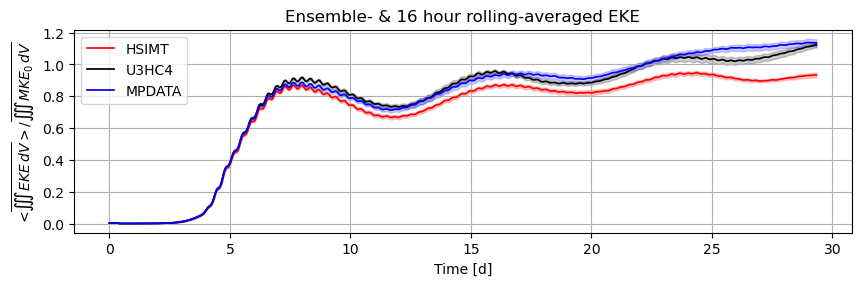

In [31]:
nrows = 1; ncols = 1
fig, ax = plt.subplots(nrows,ncols, figsize = (8.5, 2.75), 
                       sharex = True, constrained_layout = True)

ax.plot(time[:705], (eke_hsimt[0]/mke_h[0][0])[:705], lw = 1.25, color = 'r', label = 'HSIMT')
ax.plot(time[:705], (eke_u3hc4[0]/mke_u[0][0])[:705], lw = 1.25, color = 'k', label = 'U3HC4')
ax.plot(time[:705], (eke_mpdata[0]/mke_m[0][0])[:705], lw = 1.25, color = 'b', label = 'MPDATA')
ax.fill_between(time[:705], (eke_hsimt[2]/mke_h[0][0])[:705], (eke_hsimt[3]/mke_h[0][0])[:705], color = 'r', alpha = 0.2)
ax.fill_between(time[:705], (eke_u3hc4[2]/mke_u[0][0])[:705], (eke_u3hc4[3]/mke_u[0][0])[:705], color = 'k', alpha = 0.2)
ax.fill_between(time[:705], (eke_mpdata[2]/mke_m[0][0])[:705], (eke_mpdata[3]/mke_m[0][0])[:705], color = 'b', alpha = 0.2)
ax.legend()
ax.set_ylabel(r'<$\overline{\iiint EKE \, dV}> / \overline{\iiint MKE_0 \, dV}$')
ax.grid()
ax.set_title('Ensemble- & 16 hour rolling-averaged EKE')
ax.set_xlabel('Time [d]')
# plt.savefig('tadvection_eke_ensemble_mean.jpg')

### Now add in APE - see if we can make this work on one subplot. If not split into two 

Text(0.5, 0, 'Time [d]')

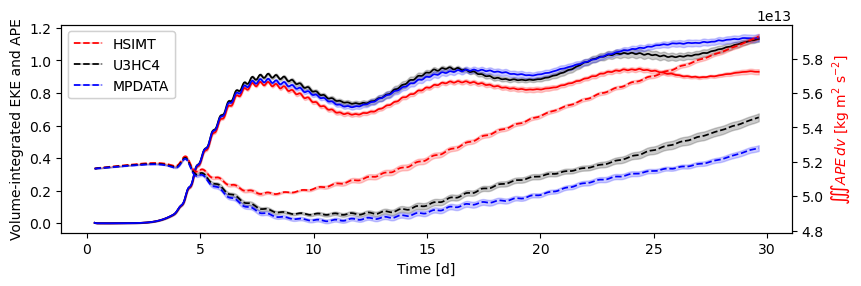

In [32]:
nrows = 1; ncols = 1
fig, ax = plt.subplots(nrows,ncols, figsize = (8.5, 2.75), 
                       sharex = True, constrained_layout = True)

ax.plot(time[8:712], (eke_hsimt[0]/mke_h[0][0])[8:712], lw = 1.25, color = 'r', label = 'HSIMT')
ax.plot(time[8:712], (eke_u3hc4[0]/mke_u[0][0])[8:712], lw = 1.25, color = 'k', label = 'U3HC4')
ax.plot(time[8:712], (eke_mpdata[0]/mke_m[0][0])[8:712], lw = 1.25, color = 'b', label = 'MPDATA')
ax.fill_between(time[8:712], (eke_hsimt[2]/mke_h[0][0])[8:712], (eke_hsimt[3]/mke_h[0][0])[8:712], color = 'r', alpha = 0.2)
ax.fill_between(time[8:712], (eke_u3hc4[2]/mke_u[0][0])[8:712], (eke_u3hc4[3]/mke_u[0][0])[8:712], color = 'k', alpha = 0.2)
ax.fill_between(time[8:712], (eke_mpdata[2]/mke_m[0][0])[8:712], (eke_mpdata[3]/mke_m[0][0])[8:712], color = 'b', alpha = 0.2)
ax.legend()
ax.set_ylabel(r'<$\overline{\iiint EKE \, dV}> / \overline{\iiint MKE_0 \, dV}$')
ax.grid()
ax.set_title('Ensemble- & 16 hour rolling-averaged EKE')
ax.set_xlabel('Time [d]')


ax1 = ax.twinx()
ax1.plot(time[8:712], (ape_hsimt[0])[8:712], lw = 1.25, color = 'r', ls = '--', label = 'HSIMT')
ax1.plot(time[8:712], (ape_u3hc4[0])[8:712], lw = 1.25, color = 'k', ls = '--', label = 'U3HC4')
ax1.plot(time[8:712], (ape_mpdata[0])[8:712], lw = 1.25, color = 'b', ls = '--', label = 'MPDATA')

ax1.fill_between(time[8:712], (ape_hsimt[2])[8:712], (ape_hsimt[3])[8:712], color = 'r', alpha = 0.2)
ax1.fill_between(time[8:712], (ape_u3hc4[2])[8:712], (ape_u3hc4[3])[8:712], color = 'k', alpha = 0.2)
ax1.fill_between(time[8:712], (ape_mpdata[2])[8:712], (ape_mpdata[3])[8:712], color = 'b', alpha = 0.2)
ax1.set_ylabel(r'$\iiint APE \, dv$ [kg m$^2$ s$^{-2}$]', color = 'r')
ax1.legend()
ax.set_ylabel(r'Volume-integrated EKE and APE')
ax.grid()
ax.set_title('')
ax.set_xlabel('Time [d]')

# plt.savefig('tadvection_eke_ensemble_mean.jpg')

### Very interesting results - HSIMT has the most physical mixing in the top 1 m but somehow has the most salinity variance. 
Counter-intuitive result. Need to pair with plots of surface and bottom isohalines 

### Combine all the ensembles into two giant plots. For the whole domain and top 1 m

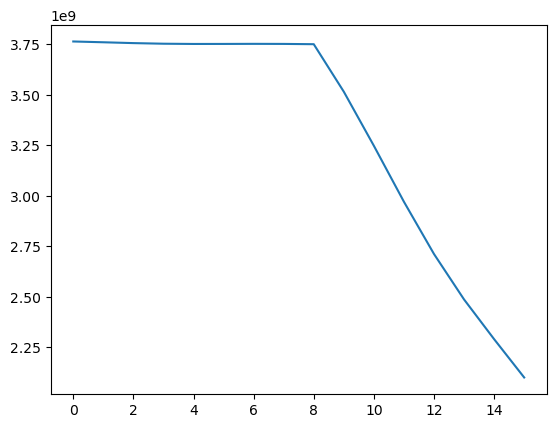

In [33]:
# plt.plot(eke_hsimt[0][:16])
plt.plot(eke_hsimt[0][-16:])

In [34]:
print(svar_tot_hsimt[0][-1])
print(svar_tot_u3hc4[0][-1])
print(svar_tot_mpdata[0][-1])

0.9800749453181617
0.9750398467585687
0.9671046954367708


In [35]:
print(svar_tot_hsimt[0][712])
print(svar_tot_u3hc4[0][712])
print(svar_tot_mpdata[0][712])

1.7475225159158458
1.739049880623798
1.7249052241074567


In [36]:
print(svar_ver_hsimt[0][712])
print(svar_ver_u3hc4[0][712])
print(svar_ver_mpdata[0][712])

0.1850080274641826
0.2867960285057838
0.33375049562768466


In [37]:
print(svar_hor_hsimt[0][712])
print(svar_hor_u3hc4[0][712])
print(svar_hor_mpdata[0][712])

1.5625144884516633
1.4522538521180142
1.3911547284797723


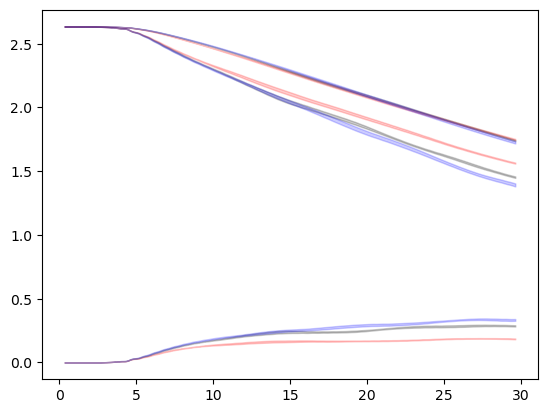

In [38]:
# plt.plot(time[8:712], (svar_tot_hsimt[0])[8:712], lw = 1.25, color = 'r', label = '')
# plt.plot(time[8:712], (svar_tot_u3hc4[0])[8:712], lw = 1.25, color = 'k', label = '')
# plt.plot(time[8:712], (svar_tot_mpdata[0])[8:712], lw = 1.25, color = 'b', label = '')

# plt.plot(time[8:712], (svar_ver_hsimt[0])[8:712], lw = 1.25, color = 'r', ls = '--', label = '')
# plt.plot(time[8:712], (svar_ver_u3hc4[0])[8:712], lw = 1.25, color = 'k', ls = '--', label = '')
# plt.plot(time[8:712], (svar_ver_mpdata[0])[8:712], lw = 1.25, color = 'b', ls = '--', label = '')

# plt.plot(time[8:712], (svar_hor_hsimt[0])[8:712], lw = 1.25, color = 'r', ls = '-.', label = '')
# plt.plot(time[8:712], (svar_hor_u3hc4[0])[8:712], lw = 1.25, color = 'k', ls = '-.', label = '')
# plt.plot(time[8:712], (svar_hor_mpdata[0])[8:712], lw = 1.25, color = 'b', ls = '-.', label = '')

plt.fill_between(time[8:712], svar_tot_hsimt[2][8:712], (svar_tot_hsimt[3])[8:712], color = 'r', alpha = 0.2)
plt.fill_between(time[8:712], svar_tot_u3hc4[2][8:712], (svar_tot_u3hc4[3])[8:712], color = 'k', alpha = 0.2)
plt.fill_between(time[8:712], svar_tot_mpdata[2][8:712], (svar_tot_mpdata[3])[8:712], color = 'b', alpha = 0.2)

plt.fill_between(time[8:712], svar_ver_hsimt[2][8:712], (svar_ver_hsimt[3])[8:712], color = 'r', alpha = 0.2)
plt.fill_between(time[8:712], svar_ver_u3hc4[2][8:712], (svar_ver_u3hc4[3])[8:712], color = 'k', alpha = 0.2)
plt.fill_between(time[8:712], svar_ver_mpdata[2][8:712], (svar_ver_mpdata[3])[8:712], color = 'b', alpha = 0.2)

plt.fill_between(time[8:712], svar_hor_hsimt[2][8:712], (svar_hor_hsimt[3])[8:712], color = 'r', alpha = 0.2)
plt.fill_between(time[8:712], svar_hor_u3hc4[2][8:712], (svar_hor_u3hc4[3])[8:712], color = 'k', alpha = 0.2)
plt.fill_between(time[8:712], svar_hor_mpdata[2][8:712], (svar_hor_mpdata[3])[8:712], color = 'b', alpha = 0.2)


Text(25, 0.5, '$<\\overline{\\frac{1}{V} \\iiint s_{v}^{\\prime^2} \\, dV}>$')

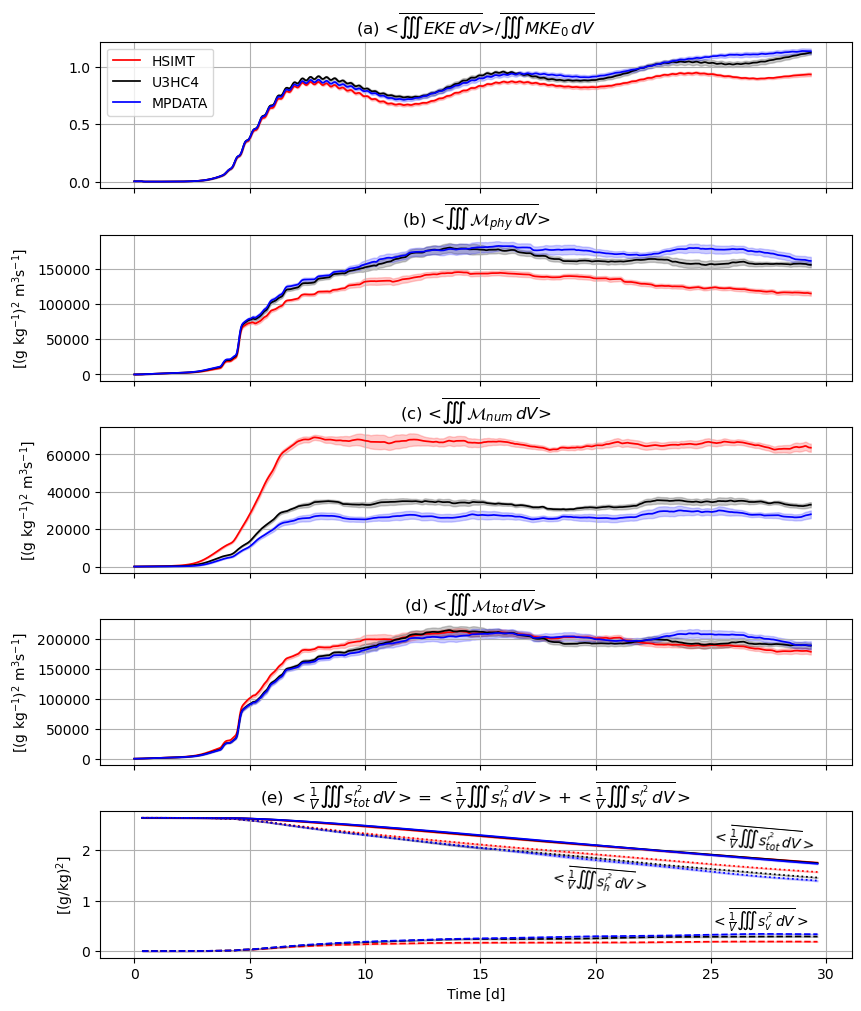

In [39]:
nrows = 5; ncols = 1
fig, ax = plt.subplots(nrows,ncols, figsize = (8.5, 10), 
                       sharex = True, constrained_layout = True)

ax[0].plot(time[:705], (eke_hsimt[0]/mke_h[0][0])[:705], lw = 1.25, color = 'r', label = 'HSIMT')
ax[0].plot(time[:705], (eke_u3hc4[0]/mke_u[0][0])[:705], lw = 1.25, color = 'k', label = 'U3HC4')
ax[0].plot(time[:705], (eke_mpdata[0]/mke_m[0][0])[:705], lw = 1.25, color = 'b', label = 'MPDATA')
ax[0].fill_between(time[:705], (eke_hsimt[2]/mke_h[0][0])[:705], (eke_hsimt[3]/mke_h[0][0])[:705], color = 'r', alpha = 0.2)
ax[0].fill_between(time[:705], (eke_u3hc4[2]/mke_u[0][0])[:705], (eke_u3hc4[3]/mke_u[0][0])[:705], color = 'k', alpha = 0.2)
ax[0].fill_between(time[:705], (eke_mpdata[2]/mke_m[0][0])[:705], (eke_mpdata[3]/mke_m[0][0])[:705], color = 'b', alpha = 0.2)
ax[0].legend()
ax[0].set_ylabel(r'')
ax[0].set_title('(a) <$\overline{\iiint EKE \, dV}$>/$\overline{\iiint MKE_0 \, dV}$')

ax[1].plot(time[:705], (mphy_hsimt[0])[:705], lw = 1.25, color = 'r', label = 'HSIMT')
ax[1].plot(time[:705], (mphy_u3hc4[0])[:705], lw = 1.25, color = 'k', label = 'U3HC4')
ax[1].plot(time[:705], (mphy_mpdata[0])[:705], lw = 1.25, color = 'b', label = 'MPDATA')
ax[1].fill_between(time[:705], (mphy_hsimt[2])[:705], (mphy_hsimt[3])[:705], color = 'r', alpha = 0.2)
ax[1].fill_between(time[:705], (mphy_u3hc4[2])[:705], (mphy_u3hc4[3])[:705], color = 'k', alpha = 0.2)
ax[1].fill_between(time[:705], (mphy_mpdata[2])[:705], (mphy_mpdata[3])[:705], color = 'b', alpha = 0.2)
ax[1].set_ylabel(r'[(g kg$^{-1}$)$^2$ m$^3$s$^{-1}$]')
ax[1].set_title('(b) <$\overline{\iiint \mathcal{M}_{phy} \, dV}$>')

ax[2].plot(time[:705], (mnum_hsimt[0])[:705], lw = 1.25, color = 'r', label = 'HSIMT')
ax[2].plot(time[:705], (mnum_u3hc4[0])[:705], lw = 1.25, color = 'k', label = 'U3HC4')
ax[2].plot(time[:705], (mnum_mpdata[0])[:705], lw = 1.25, color = 'b', label = 'MPDATA')
ax[2].fill_between(time[:705], (mnum_hsimt[2])[:705], (mnum_hsimt[3])[:705], color = 'r', alpha = 0.2)
ax[2].fill_between(time[:705], (mnum_u3hc4[2])[:705], (mnum_u3hc4[3])[:705], color = 'k', alpha = 0.2)
ax[2].fill_between(time[:705], (mnum_mpdata[2])[:705], (mnum_mpdata[3])[:705], color = 'b', alpha = 0.2)
ax[2].set_ylabel(r'[(g kg$^{-1}$)$^2$ m$^3$s$^{-1}$]')
ax[2].set_title('(c) <$\overline{\iiint \mathcal{M}_{num} \, dV}$>')

ax[3].plot(time[:705], (mtot_hsimt[0])[:705], lw = 1.25, color = 'r', label = 'HSIMT')
ax[3].plot(time[:705], (mtot_u3hc4[0])[:705], lw = 1.25, color = 'k', label = 'U3HC4')
ax[3].plot(time[:705], (mtot_mpdata[0])[:705], lw = 1.25, color = 'b', label = 'MPDATA')
ax[3].fill_between(time[:705], (mtot_hsimt[2])[:705], (mtot_hsimt[3])[:705], color = 'r', alpha = 0.2)
ax[3].fill_between(time[:705], (mtot_u3hc4[2])[:705], (mtot_u3hc4[3])[:705], color = 'k', alpha = 0.2)
ax[3].fill_between(time[:705], (mtot_mpdata[2])[:705], (mtot_mpdata[3])[:705], color = 'b', alpha = 0.2)
ax[3].set_ylabel(r'[(g kg$^{-1}$)$^2$ m$^3$s$^{-1}$]')
ax[3].set_title('(d) <$\overline{\iiint \mathcal{M}_{tot} \, dV}$>')

ax[4].plot(time[8:712], (svar_tot_hsimt[0])[8:712], lw = 1.25, color = 'r', label = '')
ax[4].plot(time[8:712], (svar_tot_u3hc4[0])[8:712], lw = 1.25, color = 'k', label = '')
ax[4].plot(time[8:712], (svar_tot_mpdata[0])[8:712], lw = 1.25, color = 'b', label = '')

ax[4].plot(time[8:712], (svar_ver_hsimt[0])[8:712], lw = 1.25, color = 'r', ls = '--', label = '')
ax[4].plot(time[8:712], (svar_ver_u3hc4[0])[8:712], lw = 1.25, color = 'k', ls = '--', label = '')
ax[4].plot(time[8:712], (svar_ver_mpdata[0])[8:712], lw = 1.25, color = 'b', ls = '--', label = '')

ax[4].plot(time[8:712], (svar_hor_hsimt[0])[8:712], lw = 1.25, color = 'r', ls = 'dotted', label = '')
ax[4].plot(time[8:712], (svar_hor_u3hc4[0])[8:712], lw = 1.25, color = 'k', ls = 'dotted', label = '')
ax[4].plot(time[8:712], (svar_hor_mpdata[0])[8:712], lw = 1.25, color = 'b', ls = 'dotted', label = '')

ax[4].fill_between(time[8:712], svar_tot_hsimt[2][8:712], (svar_tot_hsimt[3])[8:712], color = 'r', alpha = 0.2)
ax[4].fill_between(time[8:712], svar_tot_u3hc4[2][8:712], (svar_tot_u3hc4[3])[8:712], color = 'k', alpha = 0.2)
ax[4].fill_between(time[8:712], svar_tot_mpdata[2][8:712], (svar_tot_mpdata[3])[8:712], color = 'b', alpha = 0.2)

ax[4].fill_between(time[8:712], svar_ver_hsimt[2][8:712], (svar_ver_hsimt[3])[8:712], color = 'r', alpha = 0.2)
ax[4].fill_between(time[8:712], svar_ver_u3hc4[2][8:712], (svar_ver_u3hc4[3])[8:712], color = 'k', alpha = 0.2)
ax[4].fill_between(time[8:712], svar_ver_mpdata[2][8:712], (svar_ver_mpdata[3])[8:712], color = 'b', alpha = 0.2)

ax[4].fill_between(time[8:712], svar_hor_hsimt[2][8:712], (svar_hor_hsimt[3])[8:712], color = 'r', alpha = 0.2)
ax[4].fill_between(time[8:712], svar_hor_u3hc4[2][8:712], (svar_hor_u3hc4[3])[8:712], color = 'k', alpha = 0.2)
ax[4].fill_between(time[8:712], svar_hor_mpdata[2][8:712], (svar_hor_mpdata[3])[8:712], color = 'b', alpha = 0.2)

ax[4].set_ylabel(r'[(g/kg)$^2$]')
ax[4].set_title(r'(e) $<\overline{\frac{1}{V} \iiint s_{tot}^{\prime^2} \, dV}> = <\overline{\frac{1}{V} \iiint s_{h}^{\prime^2} \, dV}> + <\overline{\frac{1}{V} \iiint s_{v}^{\prime^2} \, dV}>$')

for i in range(nrows):
    ax[i].grid()
ax[-1].set_xlabel('Time [d]')

ax[-1].text(25, 2.0, r'$<\overline{\frac{1}{V} \iiint s_{tot}^{\prime^2} \, dV}>$', rotation = -5)
ax[-1].text(18, 1.2, r'$<\overline{\frac{1}{V} \iiint s_{h}^{\prime^2} \, dV}>$', rotation = -5)
ax[-1].text(25, 0.5, r'$<\overline{\frac{1}{V} \iiint s_{v}^{\prime^2} \, dV}>$', rotation = 0)
# plt.savefig('tadvection_vol_int.jpg', dpi = 300)

### Try combining different types of mixing on one axes 

Text(25, 0.5, '$<\\overline{\\frac{1}{V} \\iiint s_{v}^{\\prime^2} \\, dV}>$')

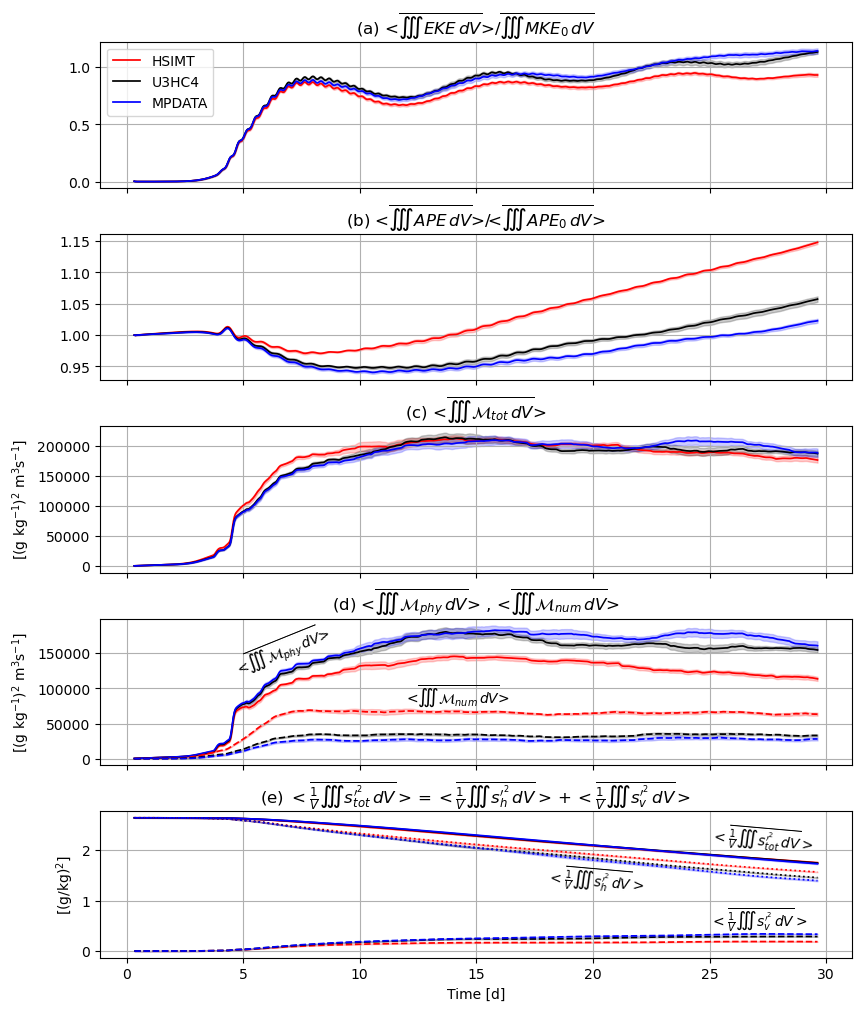

In [40]:
nrows = 5; ncols = 1
fig, ax = plt.subplots(nrows,ncols, figsize = (8.5, 10), 
                       sharex = True, constrained_layout = True)

ax[0].plot(time[8:712], (eke_hsimt[0]/mke_h[0][0])[8:712], lw = 1.25, color = 'r', label = 'HSIMT')
ax[0].plot(time[8:712], (eke_u3hc4[0]/mke_u[0][0])[8:712], lw = 1.25, color = 'k', label = 'U3HC4')
ax[0].plot(time[8:712], (eke_mpdata[0]/mke_m[0][0])[8:712], lw = 1.25, color = 'b', label = 'MPDATA')
ax[0].fill_between(time[8:712], (eke_hsimt[2]/mke_h[0][0])[8:712], (eke_hsimt[3]/mke_h[0][0])[8:712], color = 'r', alpha = 0.2)
ax[0].fill_between(time[8:712], (eke_u3hc4[2]/mke_u[0][0])[8:712], (eke_u3hc4[3]/mke_u[0][0])[8:712], color = 'k', alpha = 0.2)
ax[0].fill_between(time[8:712], (eke_mpdata[2]/mke_m[0][0])[8:712], (eke_mpdata[3]/mke_m[0][0])[8:712], color = 'b', alpha = 0.2)
ax[0].legend()
ax[0].set_ylabel(r'')
ax[0].set_title('(a) <$\overline{\iiint EKE \, dV}$>/$\overline{\iiint MKE_0 \, dV}$')

ax[1].plot(time[8:712], (ape_hsimt[0])[8:712]/ape_hsimt[0][8], lw = 1.25, color = 'r', label = 'HSIMT')
ax[1].plot(time[8:712], (ape_u3hc4[0])[8:712]/ape_u3hc4[0][8], lw = 1.25, color = 'k', label = 'U3HC4')
ax[1].plot(time[8:712], (ape_mpdata[0])[8:712]/ape_mpdata[0][8], lw = 1.25, color = 'b', label = 'MPDATA')

ax[1].fill_between(time[8:712], (ape_hsimt[2])[8:712]/ape_hsimt[2][8], (ape_hsimt[3])[8:712]/ape_hsimt[3][8], color = 'r', alpha = 0.2)
ax[1].fill_between(time[8:712], (ape_u3hc4[2])[8:712]/ape_u3hc4[2][8], (ape_u3hc4[3])[8:712]/ape_u3hc4[3][8], color = 'k', alpha = 0.2)
ax[1].fill_between(time[8:712], (ape_mpdata[2])[8:712]/ape_mpdata[2][8], (ape_mpdata[3])[8:712]/ape_mpdata[3][8], color = 'b', alpha = 0.2)
ax[1].set_title('(b) <$\overline{\iiint APE \, dV}$>/<$\overline{\iiint APE_0 \, dV}$>')

ax[2].plot(time[8:712], (mtot_hsimt[0])[8:712], lw = 1.25, color = 'r', label = 'HSIMT')
ax[2].plot(time[8:712], (mtot_u3hc4[0])[8:712], lw = 1.25, color = 'k', label = 'U3HC4')
ax[2].plot(time[8:712], (mtot_mpdata[0])[8:712], lw = 1.25, color = 'b', label = 'MPDATA')
ax[2].fill_between(time[8:712], (mtot_hsimt[2])[8:712], (mtot_hsimt[3])[8:712], color = 'r', alpha = 0.2)
ax[2].fill_between(time[8:712], (mtot_u3hc4[2])[8:712], (mtot_u3hc4[3])[8:712], color = 'k', alpha = 0.2)
ax[2].fill_between(time[8:712], (mtot_mpdata[2])[8:712], (mtot_mpdata[3])[8:712], color = 'b', alpha = 0.2)
ax[2].set_ylabel(r'[(g kg$^{-1}$)$^2$ m$^3$s$^{-1}$]')
ax[2].set_title('(c) <$\overline{\iiint \mathcal{M}_{tot} \, dV}$>')

ax[3].plot(time[8:712], (mphy_hsimt[0])[8:712], lw = 1.25, color = 'r', label = 'HSIMT')
ax[3].plot(time[8:712], (mphy_u3hc4[0])[8:712], lw = 1.25, color = 'k', label = 'U3HC4')
ax[3].plot(time[8:712], (mphy_mpdata[0])[8:712], lw = 1.25, color = 'b', label = 'MPDATA')
ax[3].fill_between(time[8:712], (mphy_hsimt[2])[8:712], (mphy_hsimt[3])[8:712], color = 'r', alpha = 0.2)
ax[3].fill_between(time[8:712], (mphy_u3hc4[2])[8:712], (mphy_u3hc4[3])[8:712], color = 'k', alpha = 0.2)
ax[3].fill_between(time[8:712], (mphy_mpdata[2])[8:712], (mphy_mpdata[3])[8:712], color = 'b', alpha = 0.2)
ax[3].set_ylabel(r'[(g kg$^{-1}$)$^2$ m$^3$s$^{-1}$]')
ax[3].set_title('(d) <$\overline{\iiint \mathcal{M}_{phy} \, dV}$> , <$\overline{\iiint \mathcal{M}_{num} \, dV}$>')

ax[3].plot(time[8:712], (mnum_hsimt[0])[8:712], lw = 1.25, color = 'r', ls = '--', label = 'HSIMT')
ax[3].plot(time[8:712], (mnum_u3hc4[0])[8:712], lw = 1.25, color = 'k', ls = '--', label = 'U3HC4')
ax[3].plot(time[8:712], (mnum_mpdata[0])[8:712], lw = 1.25, color = 'b', ls = '--', label = 'MPDATA')
ax[3].fill_between(time[8:712], (mnum_hsimt[2])[8:712], (mnum_hsimt[3])[8:712], color = 'r', alpha = 0.2)
ax[3].fill_between(time[8:712], (mnum_u3hc4[2])[8:712], (mnum_u3hc4[3])[8:712], color = 'k', alpha = 0.2)
ax[3].fill_between(time[8:712], (mnum_mpdata[2])[8:712], (mnum_mpdata[3])[8:712], color = 'b', alpha = 0.2)
ax[3].set_ylabel(r'[(g kg$^{-1}$)$^2$ m$^3$s$^{-1}$]')
ax[3].text(4.5, 120e3, r'<$\overline{\iiint \mathcal{M}_{phy} \, dV}$>', rotation = 22, )
ax[3].text(12, 80e3, r'<$\overline{\iiint \mathcal{M}_{num} \, dV}$>')

#Total
ax[4].plot(time[8:712], (svar_tot_hsimt[0])[8:712], lw = 1.25, color = 'r', label = '')
ax[4].plot(time[8:712], (svar_tot_u3hc4[0])[8:712], lw = 1.25, color = 'k', label = '')
ax[4].plot(time[8:712], (svar_tot_mpdata[0])[8:712], lw = 1.25, color = 'b', label = '')
#Vertical
ax[4].plot(time[8:712], (svar_ver_hsimt[0])[8:712], lw = 1.25, color = 'r', ls = '--', label = '')
ax[4].plot(time[8:712], (svar_ver_u3hc4[0])[8:712], lw = 1.25, color = 'k', ls = '--', label = '')
ax[4].plot(time[8:712], (svar_ver_mpdata[0])[8:712], lw = 1.25, color = 'b', ls = '--', label = '')
#Horizontal
ax[4].plot(time[8:712], (svar_hor_hsimt[0])[8:712], lw = 1.25, color = 'r', ls = 'dotted', label = '')
ax[4].plot(time[8:712], (svar_hor_u3hc4[0])[8:712], lw = 1.25, color = 'k', ls = 'dotted', label = '')
ax[4].plot(time[8:712], (svar_hor_mpdata[0])[8:712], lw = 1.25, color = 'b', ls = 'dotted', label = '')

ax[4].fill_between(time[8:712], svar_tot_hsimt[2][8:712], (svar_tot_hsimt[3])[8:712], color = 'r', alpha = 0.2)
ax[4].fill_between(time[8:712], svar_tot_u3hc4[2][8:712], (svar_tot_u3hc4[3])[8:712], color = 'k', alpha = 0.2)
ax[4].fill_between(time[8:712], svar_tot_mpdata[2][8:712], (svar_tot_mpdata[3])[8:712], color = 'b', alpha = 0.2)

ax[4].fill_between(time[8:712], svar_ver_hsimt[2][8:712], (svar_ver_hsimt[3])[8:712], color = 'r', alpha = 0.2)
ax[4].fill_between(time[8:712], svar_ver_u3hc4[2][8:712], (svar_ver_u3hc4[3])[8:712], color = 'k', alpha = 0.2)
ax[4].fill_between(time[8:712], svar_ver_mpdata[2][8:712], (svar_ver_mpdata[3])[8:712], color = 'b', alpha = 0.2)

ax[4].fill_between(time[8:712], svar_hor_hsimt[2][8:712], (svar_hor_hsimt[3])[8:712], color = 'r', alpha = 0.2)
ax[4].fill_between(time[8:712], svar_hor_u3hc4[2][8:712], (svar_hor_u3hc4[3])[8:712], color = 'k', alpha = 0.2)
ax[4].fill_between(time[8:712], svar_hor_mpdata[2][8:712], (svar_hor_mpdata[3])[8:712], color = 'b', alpha = 0.2)

ax[4].set_ylabel(r'[(g/kg)$^2$]')
ax[4].set_title(r'(e) $<\overline{\frac{1}{V} \iiint s_{tot}^{\prime^2} \, dV}> = <\overline{\frac{1}{V} \iiint s_{h}^{\prime^2} \, dV}> + <\overline{\frac{1}{V} \iiint s_{v}^{\prime^2} \, dV}>$')
# ax[4].set_yscale("log", base=8)

for i in range(nrows):
    ax[i].grid()
ax[-1].set_xlabel('Time [d]')

ax[-1].text(25, 2.0, r'$<\overline{\frac{1}{V} \iiint s_{tot}^{\prime^2} \, dV}>$', rotation = -5)
ax[-1].text(18, 1.2, r'$<\overline{\frac{1}{V} \iiint s_{h}^{\prime^2} \, dV}>$', rotation = -5)
ax[-1].text(25, 0.5, r'$<\overline{\frac{1}{V} \iiint s_{v}^{\prime^2} \, dV}>$', rotation = 0)
# plt.savefig('tadvection_vol_int.jpg', dpi = 300)

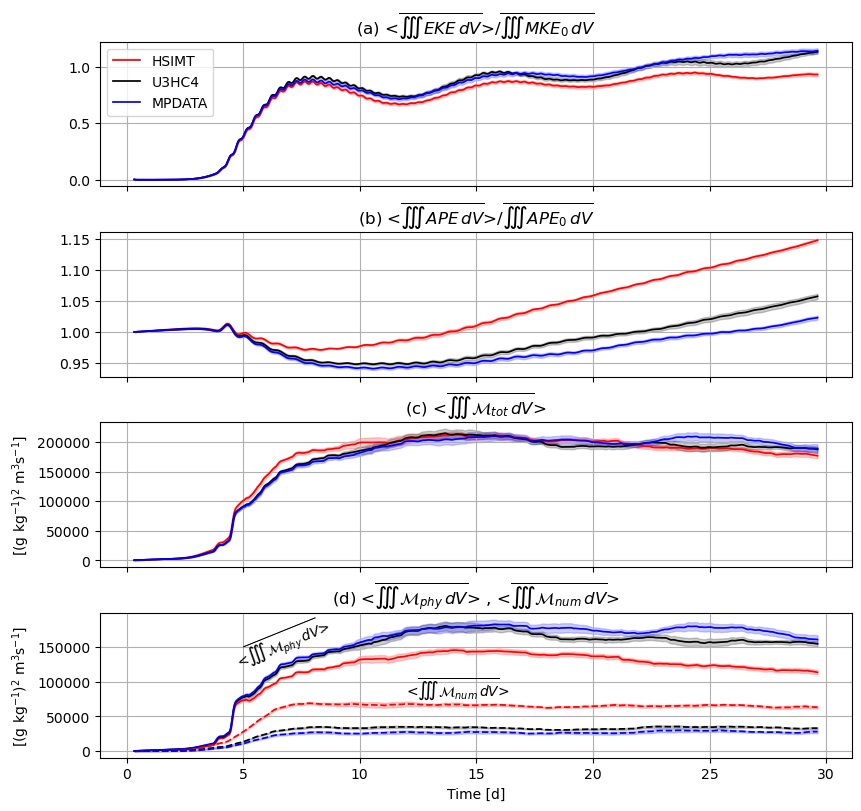

In [54]:
nrows = 4; ncols = 1
fig, ax = plt.subplots(nrows,ncols, figsize = (8.5,8), 
                       sharex = True, constrained_layout = True)

ax[0].plot(time[8:712], (eke_hsimt[0]/mke_h[0][0])[8:712], lw = 1.25, color = 'r', label = 'HSIMT')
ax[0].plot(time[8:712], (eke_u3hc4[0]/mke_u[0][0])[8:712], lw = 1.25, color = 'k', label = 'U3HC4')
ax[0].plot(time[8:712], (eke_mpdata[0]/mke_m[0][0])[8:712], lw = 1.25, color = 'b', label = 'MPDATA')
ax[0].fill_between(time[8:712], (eke_hsimt[2]/mke_h[0][0])[8:712], (eke_hsimt[3]/mke_h[0][0])[8:712], color = 'r', alpha = 0.2)
ax[0].fill_between(time[8:712], (eke_u3hc4[2]/mke_u[0][0])[8:712], (eke_u3hc4[3]/mke_u[0][0])[8:712], color = 'k', alpha = 0.2)
ax[0].fill_between(time[8:712], (eke_mpdata[2]/mke_m[0][0])[8:712], (eke_mpdata[3]/mke_m[0][0])[8:712], color = 'b', alpha = 0.2)
ax[0].legend()
ax[0].set_ylabel(r'')
ax[0].set_title('(a) <$\overline{\iiint EKE \, dV}$>/$\overline{\iiint MKE_0 \, dV}$')

ax[1].plot(time[8:712], (ape_hsimt[0])[8:712]/ape_hsimt[0][8], lw = 1.25, color = 'r', label = 'HSIMT')
ax[1].plot(time[8:712], (ape_u3hc4[0])[8:712]/ape_u3hc4[0][8], lw = 1.25, color = 'k', label = 'U3HC4')
ax[1].plot(time[8:712], (ape_mpdata[0])[8:712]/ape_mpdata[0][8], lw = 1.25, color = 'b', label = 'MPDATA')

ax[1].fill_between(time[8:712], (ape_hsimt[2])[8:712]/ape_hsimt[2][8], (ape_hsimt[3])[8:712]/ape_hsimt[3][8], color = 'r', alpha = 0.2)
ax[1].fill_between(time[8:712], (ape_u3hc4[2])[8:712]/ape_u3hc4[2][8], (ape_u3hc4[3])[8:712]/ape_u3hc4[3][8], color = 'k', alpha = 0.2)
ax[1].fill_between(time[8:712], (ape_mpdata[2])[8:712]/ape_mpdata[2][8], (ape_mpdata[3])[8:712]/ape_mpdata[3][8], color = 'b', alpha = 0.2)
ax[1].set_title('(b) <$\overline{\iiint APE \, dV}$>/$\overline{\iiint APE_0 \, dV}$')

ax[2].plot(time[8:712], (mtot_hsimt[0])[8:712], lw = 1.25, color = 'r', label = 'HSIMT')
ax[2].plot(time[8:712], (mtot_u3hc4[0])[8:712], lw = 1.25, color = 'k', label = 'U3HC4')
ax[2].plot(time[8:712], (mtot_mpdata[0])[8:712], lw = 1.25, color = 'b', label = 'MPDATA')
ax[2].fill_between(time[8:712], (mtot_hsimt[2])[8:712], (mtot_hsimt[3])[8:712], color = 'r', alpha = 0.2)
ax[2].fill_between(time[8:712], (mtot_u3hc4[2])[8:712], (mtot_u3hc4[3])[8:712], color = 'k', alpha = 0.2)
ax[2].fill_between(time[8:712], (mtot_mpdata[2])[8:712], (mtot_mpdata[3])[8:712], color = 'b', alpha = 0.2)
ax[2].set_ylabel(r'[(g kg$^{-1}$)$^2$ m$^3$s$^{-1}$]')
ax[2].set_title('(c) <$\overline{\iiint \mathcal{M}_{tot} \, dV}$>')

ax[3].plot(time[8:712], (mphy_hsimt[0])[8:712], lw = 1.25, color = 'r', label = 'HSIMT')
ax[3].plot(time[8:712], (mphy_u3hc4[0])[8:712], lw = 1.25, color = 'k', label = 'U3HC4')
ax[3].plot(time[8:712], (mphy_mpdata[0])[8:712], lw = 1.25, color = 'b', label = 'MPDATA')
ax[3].fill_between(time[8:712], (mphy_hsimt[2])[8:712], (mphy_hsimt[3])[8:712], color = 'r', alpha = 0.2)
ax[3].fill_between(time[8:712], (mphy_u3hc4[2])[8:712], (mphy_u3hc4[3])[8:712], color = 'k', alpha = 0.2)
ax[3].fill_between(time[8:712], (mphy_mpdata[2])[8:712], (mphy_mpdata[3])[8:712], color = 'b', alpha = 0.2)
ax[3].set_ylabel(r'[(g kg$^{-1}$)$^2$ m$^3$s$^{-1}$]')
ax[3].set_title('(d) <$\overline{\iiint \mathcal{M}_{phy} \, dV}$> , <$\overline{\iiint \mathcal{M}_{num} \, dV}$>')

ax[3].plot(time[8:712], (mnum_hsimt[0])[8:712], lw = 1.25, color = 'r', ls = '--', label = 'HSIMT')
ax[3].plot(time[8:712], (mnum_u3hc4[0])[8:712], lw = 1.25, color = 'k', ls = '--', label = 'U3HC4')
ax[3].plot(time[8:712], (mnum_mpdata[0])[8:712], lw = 1.25, color = 'b', ls = '--', label = 'MPDATA')
ax[3].fill_between(time[8:712], (mnum_hsimt[2])[8:712], (mnum_hsimt[3])[8:712], color = 'r', alpha = 0.2)
ax[3].fill_between(time[8:712], (mnum_u3hc4[2])[8:712], (mnum_u3hc4[3])[8:712], color = 'k', alpha = 0.2)
ax[3].fill_between(time[8:712], (mnum_mpdata[2])[8:712], (mnum_mpdata[3])[8:712], color = 'b', alpha = 0.2)
ax[3].set_ylabel(r'[(g kg$^{-1}$)$^2$ m$^3$s$^{-1}$]')
ax[3].text(4.5, 120e3, r'<$\overline{\iiint \mathcal{M}_{phy} \, dV}$>', rotation = 22, )
ax[3].text(12, 80e3, r'<$\overline{\iiint \mathcal{M}_{num} \, dV}$>')

for i in range(nrows):
    ax[i].grid()
ax[-1].set_xlabel('Time [d]')

plt.savefig('tadvection_vol_int.jpg', dpi = 300)

In [45]:
(ape_hsimt[0])[712]/(ape_u3hc4[0])[712]

1.0859490431343806

In [46]:
(ape_hsimt[0])[712]/(ape_mpdata[0])[712]

1.1227613437570314

### Get mixing statistics 

In [7]:
print((mtot_mpdata[0][8:712].sum())/((mtot_hsimt[0])[8:712].sum()))
print((mtot_u3hc4[0][8:712].sum())/((mtot_hsimt[0])[8:712].sum()))
print((mtot_u3hc4[0][8:712].sum())/((mtot_mpdata[0])[8:712].sum()))

0.9957982705819783
0.9854905743596403
0.9896488108818327


In [8]:
print((mphy_mpdata[0][8:712].sum())/((mphy_hsimt[0])[8:712].sum()))
print((mphy_u3hc4[0][8:712].sum())/((mphy_hsimt[0])[8:712].sum()))
print((mphy_mpdata[0][8:712].sum())/((mphy_u3hc4[0])[8:712].sum()))

1.2924428443722296
1.2266230280668222
1.0536593678737147


In [9]:
print((mnum_hsimt[0][8:712].sum())/((mnum_mpdata[0])[8:712].sum()))
print((mnum_hsimt[0][8:712].sum())/((mnum_u3hc4[0])[8:712].sum()))
print((mnum_u3hc4[0][8:712].sum())/((mnum_mpdata[0])[8:712].sum()))

2.437595997364002
1.9626698451823785
1.241979644894117


In [10]:
print((mtot_hsimt[0][8:712].sum())/((mtot_mpdata[0])[8:712].sum()))
print((mtot_hsimt[0][8:712].sum())/((mtot_u3hc4[0])[8:712].sum()))
print((mtot_u3hc4[0][8:712].sum())/((mtot_mpdata[0])[8:712].sum()))

1.00421945844068
1.0147230486195038
0.9896488108818327


### Bulk ratios for Table 1 

In [13]:
print((mphy_mpdata[0][8:712].sum())/((mtot_mpdata[0])[8:712].sum()))
print((mnum_mpdata[0][8:712].sum())/((mtot_mpdata[0])[8:712].sum()))

print((mphy_hsimt[0][8:712].sum())/((mtot_hsimt[0])[8:712].sum()))
print((mnum_hsimt[0][8:712].sum())/((mtot_hsimt[0])[8:712].sum()))

print((mphy_u3hc4[0][8:712].sum())/((mtot_u3hc4[0])[8:712].sum()))
print((mnum_u3hc4[0][8:712].sum())/((mtot_u3hc4[0])[8:712].sum()))

0.861472823000192
0.13852717700845993
0.6637455196045019
0.33625448039643135
0.8261525379398937
0.17384746206671756


### Bulk values for Table 1 

In [21]:
print(mphy_mpdata[0][8:712].sum()/10**7)
print(mnum_mpdata[0][8:712].sum()/10**7)
print(mtot_mpdata[0][8:712].sum()/10**7)

print(mphy_u3hc4[0][8:712].sum()/10**7)
print(mnum_u3hc4[0][8:712].sum()/10**7)
print(mtot_u3hc4[0][8:712].sum()/10**7)

print(mphy_hsimt[0][8:712].sum()/10**7)
print(mnum_hsimt[0][8:712].sum()/10**7)
print(mtot_hsimt[0][8:712].sum()/10**7)

9.897567562418091
1.5915558298140027
11.48912339213269
9.39351735883238
1.9766799443415568
11.370197303098765
7.658031150480451
3.879570120335956
11.53760127080564


### EKE statistics 

In [22]:
(eke_hsimt[0]/mke_h[0][0]).mean()
(eke_mpdata[0]/mke_h[0][0]).mean()

0.7723000617729554